SIMPLE LINEAR REGRESSION-ML

In [2]:
import numpy as np
x_values = np.random.random(10)
x_values

array([0.88027438, 0.60773521, 0.53626103, 0.48101155, 0.73438753,
       0.34521122, 0.25674383, 0.11973383, 0.35944485, 0.0683912 ])

In [3]:
##normalization function (min-max scaler)
def minmax(x):
    x_min = np.min(x)
    x_max = np.max(x)
    y = (x-x_min)/(x_max-x_min) 
    return y
results = minmax(x_values)
results

array([1.        , 0.66431234, 0.57627728, 0.50822626, 0.82031053,
       0.34096041, 0.23199475, 0.06323895, 0.35849204, 0.        ])

In [4]:
##standardization function
def stand(x):
    x_mean = np.mean(x)
    x_std = np.std(x)
    y = (x-x_mean)/(x_std) 
    return y
results = stand(x_values)
results

array([ 1.78802372,  0.68390892,  0.39435162,  0.17052409,  1.19700468,
       -0.37963224, -0.73803268, -1.29308964, -0.32196875, -1.50108972])

LINEAR REGRESSION-CAR PRICE PREDICTION

In [5]:
##importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

EXPLOARATORY DATA ANALYSIS
1. import data using the pandas libraries
2. understanding the structure of the data

In [6]:
cars = pd.read_csv('CarPrice_Assignment.csv')
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
cars.describe() #understanding of the numeric data(statistical)
##also try to find out whether there are anomalies in the data by looking at the mean, min and max values to see if there
#are any outliers be it small or large

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

DATA PREPROCESSING STEPS

In [9]:
##splitting car company name from CarName column
CompanyName = cars['CarName'].apply(lambda x:x.split(' ')[0])
cars.insert(3, 'CompanyName', CompanyName)
cars.drop(['CarName'], axis=1, inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
#check for unique company names
#to find out if there are any anomalies that need to be corrected
cars.CompanyName.unique()
#disovered that there are anomalies in company name spellings eg mazda:maxda, toyota:toyouta etc

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Fixing invalid values
1. maxda = mazda
2. Nissan = nissan
3. porsche=porcshe
4. toyota=toyouta
5. vokswagen = volkswagen =vw

In [11]:
cars.CompanyName = cars.CompanyName.str.lower()
def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)
replace_name('alfa-romero', 'alfa-romeo')
replace_name('maxda', 'mazda')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16548\4037040491.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars.CompanyName.replace(a,b,inplace=True)


In [12]:
cars.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
##checking for duplicates
cars.loc[cars.duplicated()]
##observe that there are no duplicates n the observations or rows

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [14]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

ANALYSIS-VISUALIZATIONS

Distributions

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16548\2118825501.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars.price) #check the ditribution of the car prices


<Axes: title={'center': 'Car Price Spread'}, ylabel='price'>

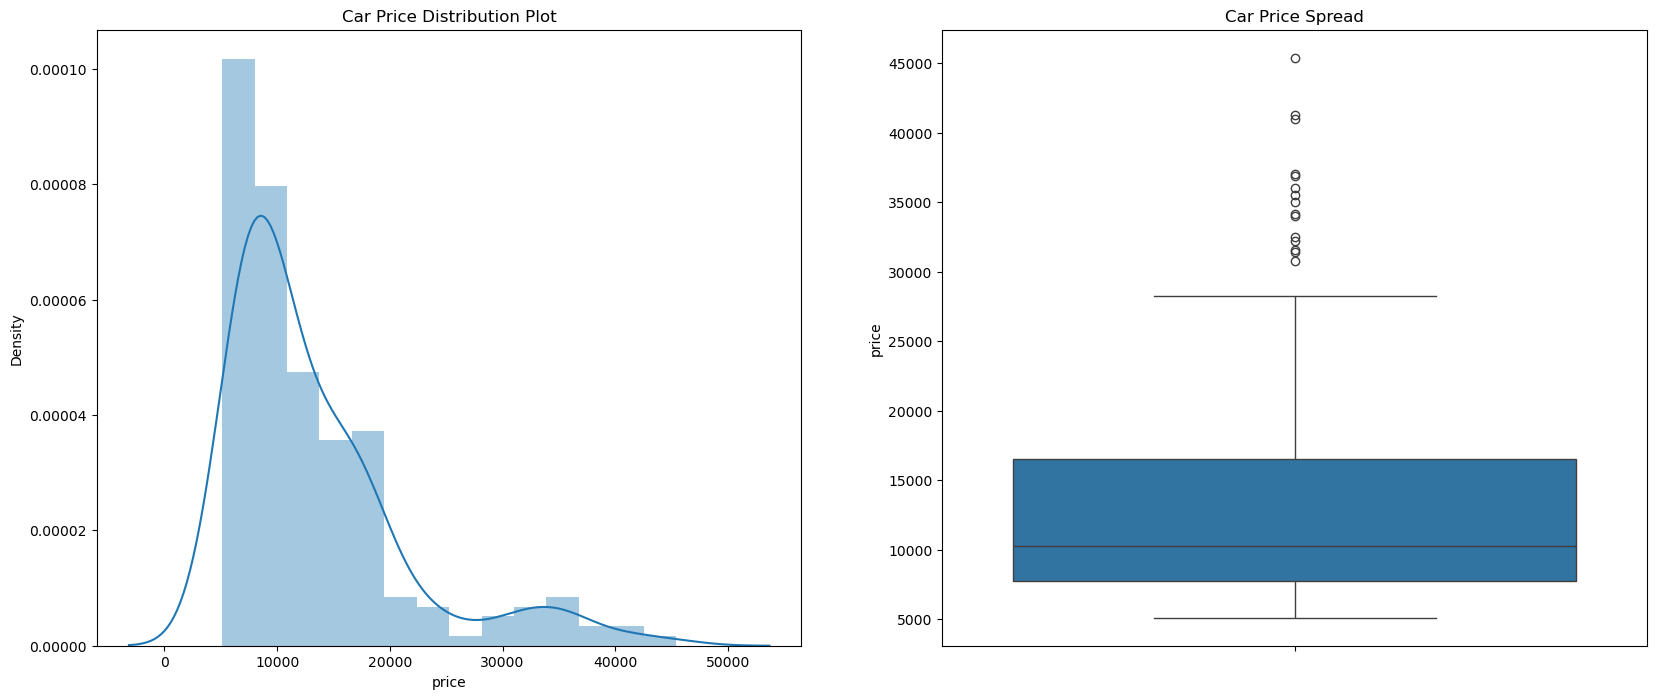

In [15]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price) #check the ditribution of the car prices

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price) #check the spread of the car prices


In [16]:
print(cars.price.describe(percentiles=[0.25,0.5,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


observastions:
1. most of the prices are concentrated around 10000-15000 range
2. there is a significant difference between the mean snd the median of the price distribution
3. the data points are far spread out from the mean, which indicates a high variance in the car prices.
4. 85% of the prices are below 18500, whereas the remanining 15% are between 18500 and 45400

In [17]:
cars.columns if cars.columns.dtype=='object' and cars.columns.dtype!='float64' else None

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Visualising categorical data
the following are the categorical data
1. company name
2. symboling
3. fueltype
4. aspiration
5. doornumber
6. carbody
7. drivewheel
8. enginelocation
14. enginetype
15. cylindernumber
17. fuelsystem

Determine the number of cars per company/fueltype/cartype

[Text(0.5, 0, 'Car type'), Text(0, 0.5, 'Frequwncy of Car type')]

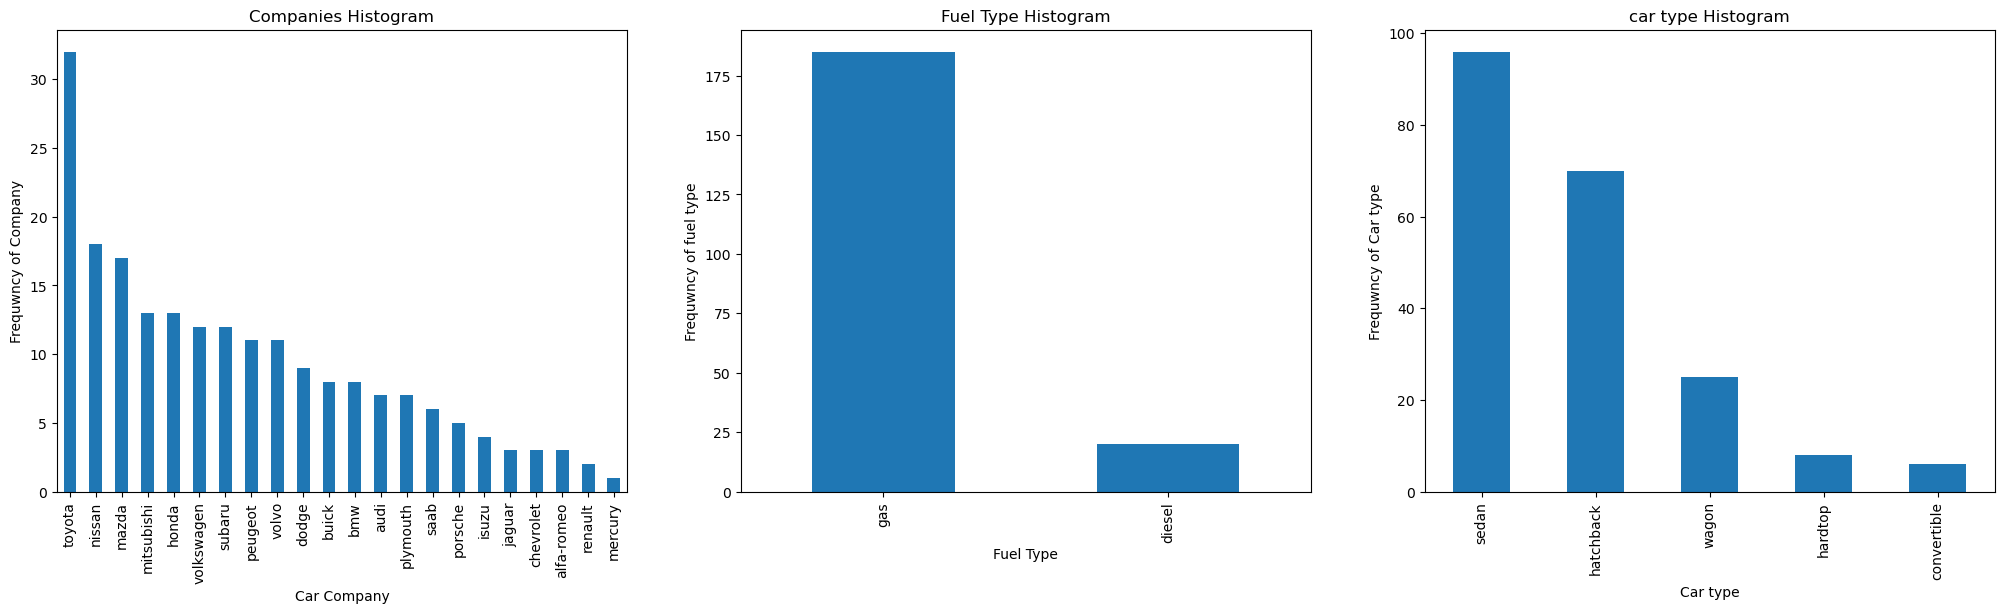

In [18]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel='Car Company', ylabel='Frequwncy of Company')

plt.subplot(1,3,2)
plt2 = cars.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt2.set(xlabel='Fuel Type', ylabel='Frequwncy of fuel type')

plt.subplot(1,3,3)
plt3 = cars.carbody.value_counts().plot(kind='bar')
plt.title('car type Histogram')
plt3.set(xlabel='Car type', ylabel='Frequwncy of Car type')

inference:
1. toyota seemed to be favored care company
2. number of gas fueled cars are more than diesel
3. sedan is the top car type preferred by customers

DETERMINE COUNT/FREQUENCY AND DISTRIBUTION/SPREAD OF PRICE VALUES PER SYMBOLING CATEGORY

In [19]:
cars.symboling

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

<Axes: title={'center': 'Symboling vs Price'}, xlabel='symboling', ylabel='price'>

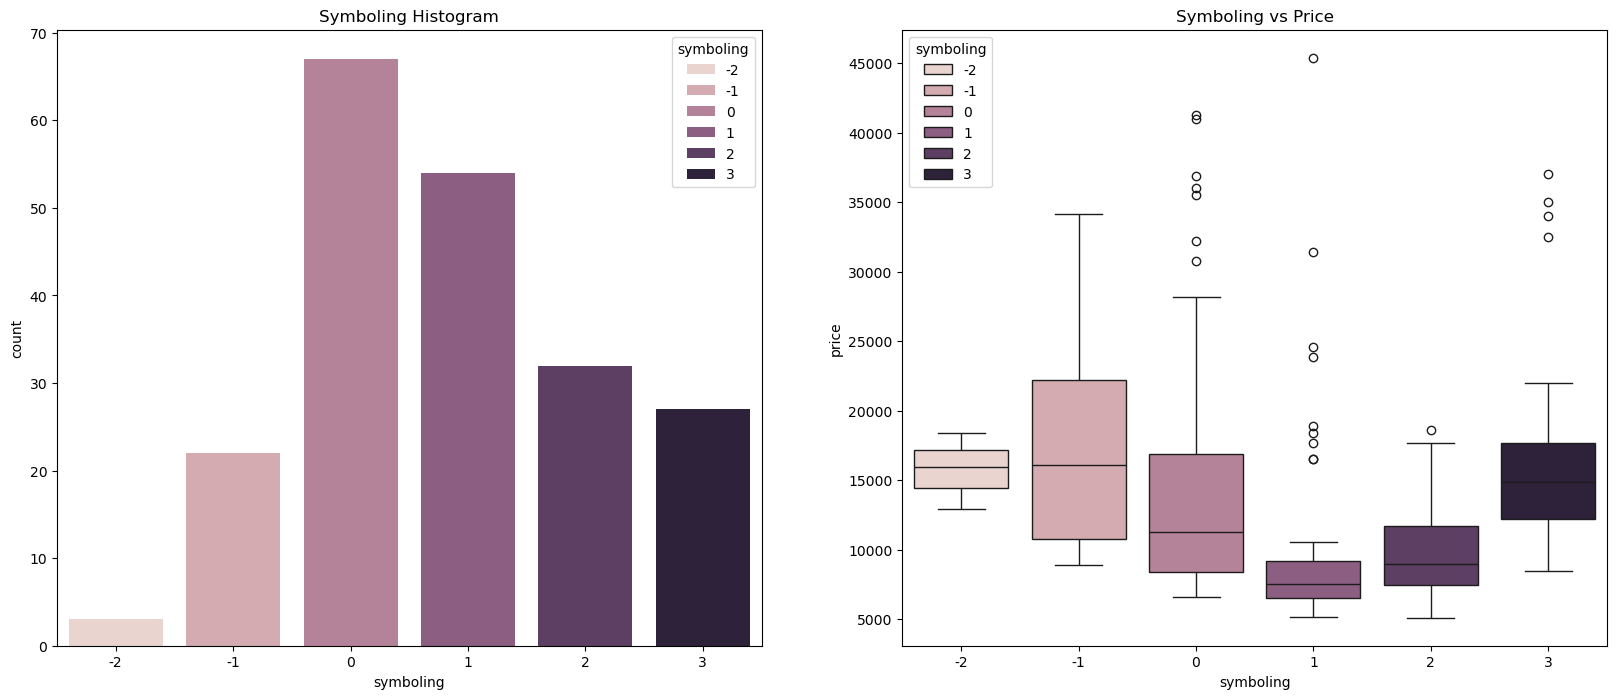

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(x=cars.symboling, hue=cars.symboling)

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, hue=cars.symboling)

Inference:
1. it seems that the symboling with 0 and 1 values have high number of rows (i.e they are most sold)
2. the cars with -1 symboling seems to be the high priced (as it makes sense too, insurance risk rating -1 is quite good). but it seems that symboling with 3 value has the price range similar to -2 value. there is a dip in price at symboling 1.

<Axes: title={'center': 'engine type vs Price'}, xlabel='enginetype', ylabel='price'>

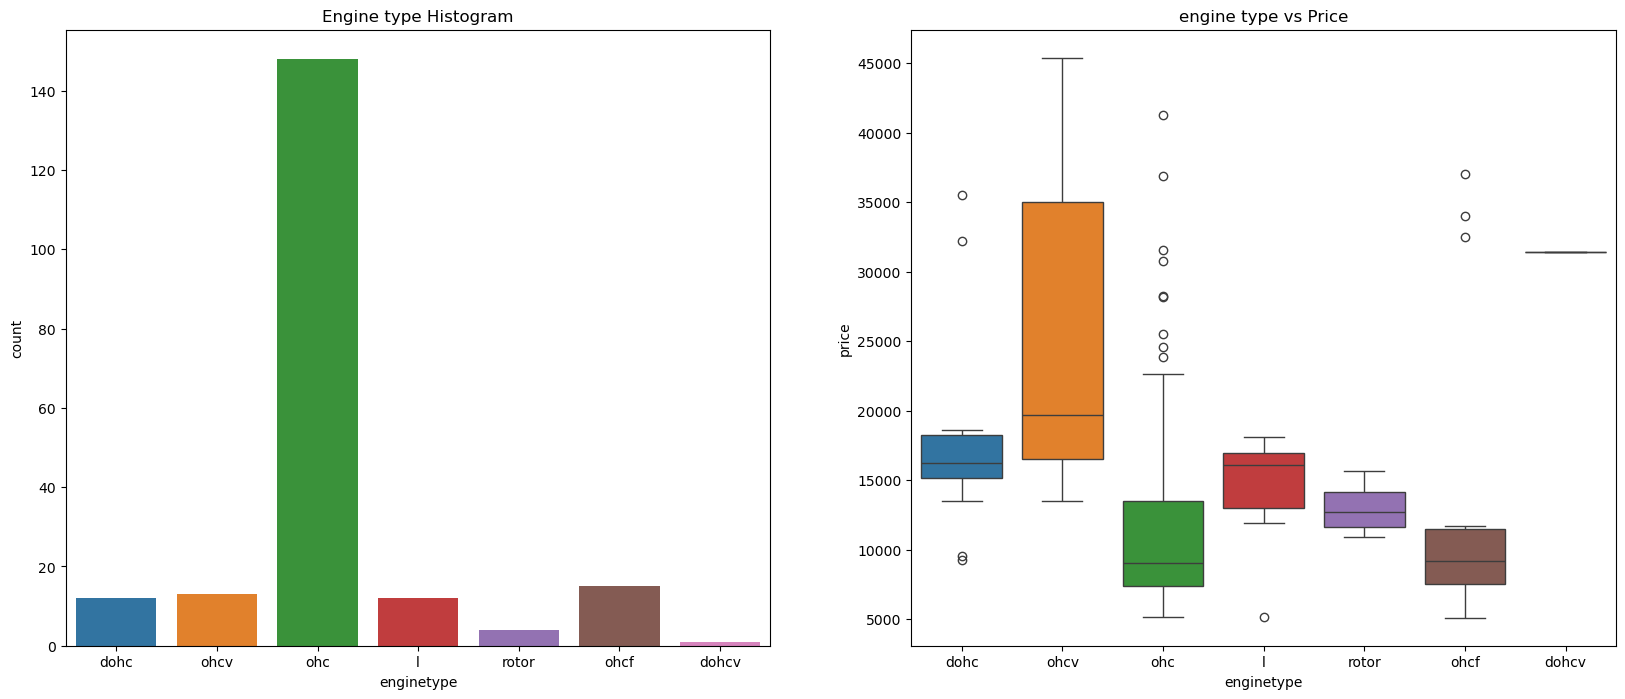

In [21]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine type Histogram')
sns.countplot(x=cars.enginetype, hue=cars.enginetype)

plt.subplot(1,2,2)
plt.title('engine type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, hue=cars.enginetype)

Inference:
1. engine type 'ohc' has the highest number of rows, thus it is the most sold
2. engine type 'ohcv' has the highest price ranges followed by dohcv. the enginetypes with the lowest price spread is ohcf

Text(0.5, 1.0, 'Engine type vs average price')

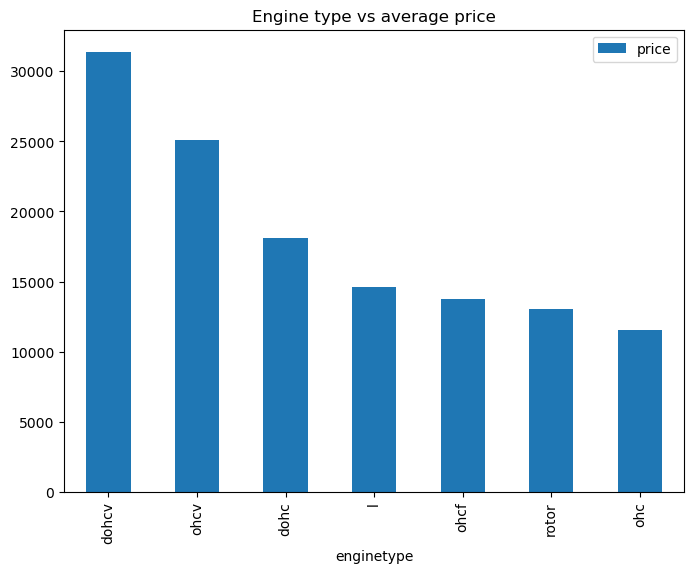

In [22]:
##fro the analysis above, we notice that the enginetype could have a direct relationship with car prices
#hence we dig deeper by finding out the mean prices for carswith specific engine types
df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending=False))
df.plot.bar(figsize=(8,6))
plt.title('Engine type vs average price')

Inference:
1. ohc enginetype seemed to be the most favored type
2. ohcv has the highest price range (while dohcv has only oen row), ohc and ohcf have low price ranges

Determine the average price of cars with other factors such as company name, fueltype, carbody

Text(0.5, 1.0, 'Average Price vs Car body')

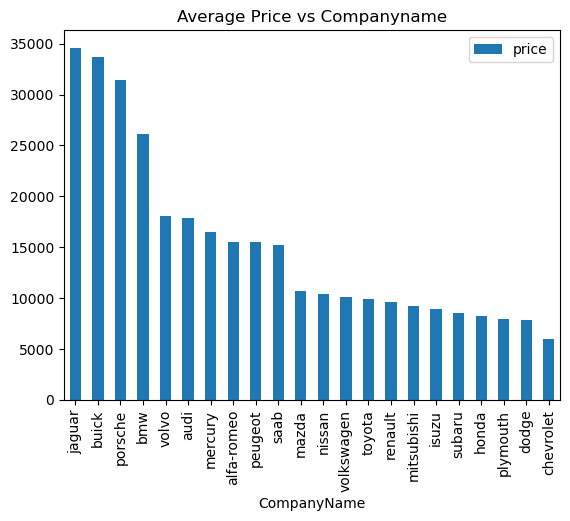

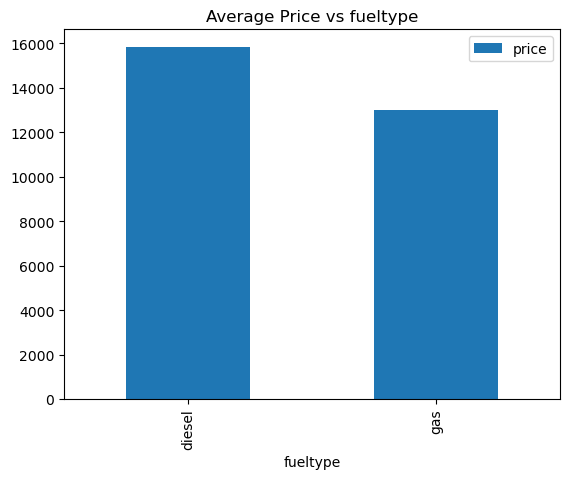

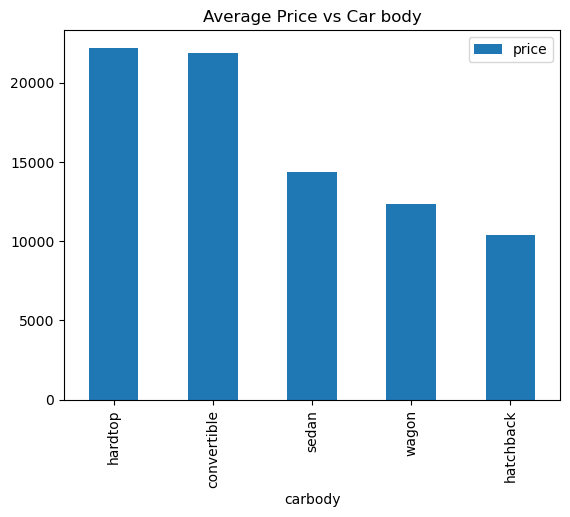

In [23]:
df1 = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending=False))
df1.plot.bar()
plt.title('Average Price vs Companyname')



df2 = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending=False))
df2.plot.bar()
plt.title('Average Price vs fueltype')


df3 = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
df3.plot.bar()
plt.title('Average Price vs Car body')


inference:
1. jaguar and buick seem to have the highest average price
2. diesel has the higher average price than gas
3. hardtop and convertible have higher average price

For Aspiration and DoorNumber, counts and distribution

Text(0.5, 1.0, 'Aspiration Spread by Price')

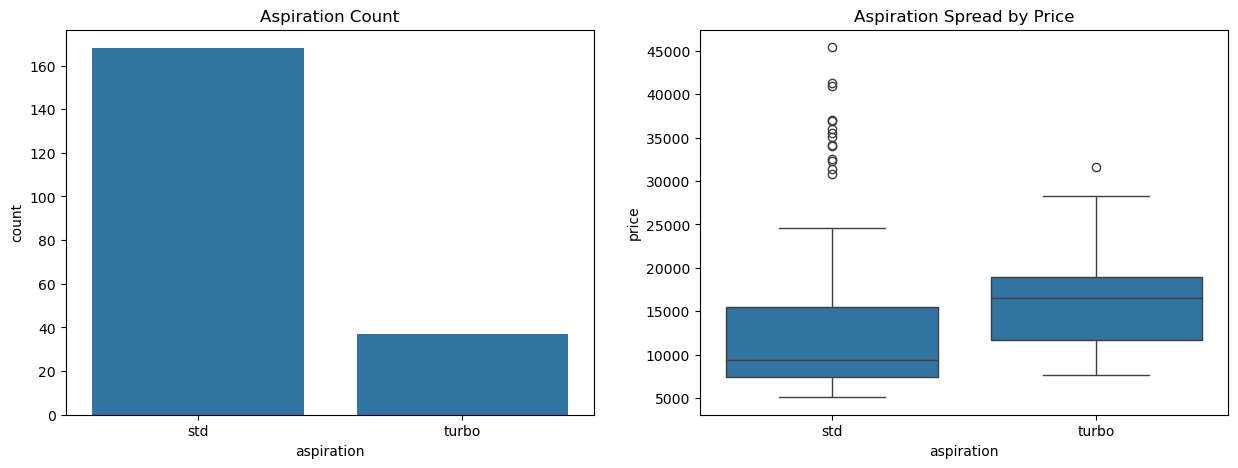

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x=cars.aspiration)
plt.title('Aspiration Count')

plt.subplot(1,2,2)
sns.boxplot(x=cars.aspiration, y=cars.price)
plt.title('Aspiration Spread by Price')

Inference
1. we can observe that cars with aspiration=std are more favored
2. the price range for cars with turbo is higher than that of std, this implies why the std cars are purchased more
3. there is a possible relationship between car aspiration and price, thus we can investigate the average price of cars by aspiration

In [25]:
plt.figure(figsize=(8,6))

df = pd.DataFrame(cars.groupby(['aspiration'])['price'].mean().sort_values(ascending=True))
df

,price
aspiration,
std,12611.270833
turbo,16298.166676


<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Average Car price vs aspiration')

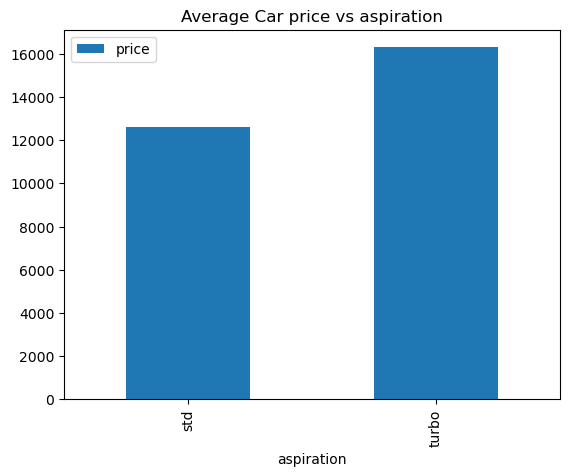

In [26]:
df.plot.bar()
plt.title('Average Car price vs aspiration')

inference:
1. we can see that cars with turbo aspiration has ahigher average price as compared to that of std

In [27]:
##investigating the engine location distribution and price range
df = pd.DataFrame(cars.groupby(['enginelocation']).count())
df

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
enginelocation,,,,,,,,,,,,,,,,,,,,,
front,202,202,202,202,202,202,202,202,202,202,...,202,202,202,202,202,202,202,202,202,202
rear,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [28]:
##we see from the datatable that cars with front engine location are preferred highky to those with rear engine location
#for price:
df = pd.DataFrame(cars.groupby(['enginelocation', 'aspiration'])['price'].sum())
df

price
enginelocation aspiration             
front          std         2015109.500
               turbo        603032.167
rear           std          103584.000

<Axes: xlabel='enginelocation,aspiration'>

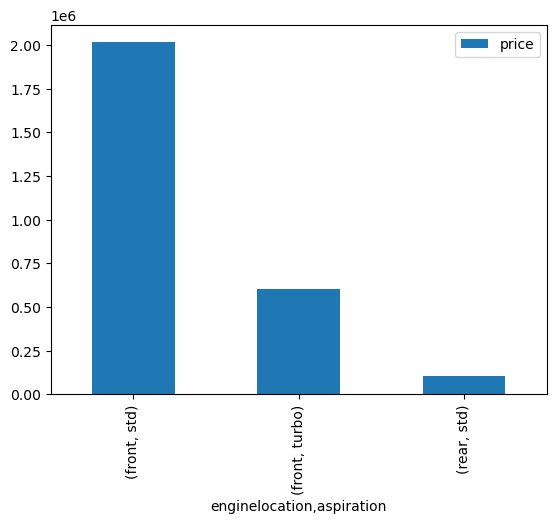

In [29]:
##this shows all the sum of car prices with an engine location
df.plot.bar()

inference:
1. we can see from this that, cars with a front engine location and std aspiration are purchased more followed by front engine with turbo
2. the least favorite is cars with rear engine and std aspiration.
3. there are no cars with rear engine location and turbo aspiration purchased

In [30]:
#investigating the mean price for all
df = pd.DataFrame(cars.groupby(['enginelocation', 'aspiration'])['price'].mean())
df

price
enginelocation aspiration              
front          std         12212.784848
               turbo       16298.166676
rear           std         34528.000000

<Axes: xlabel='enginelocation,aspiration'>

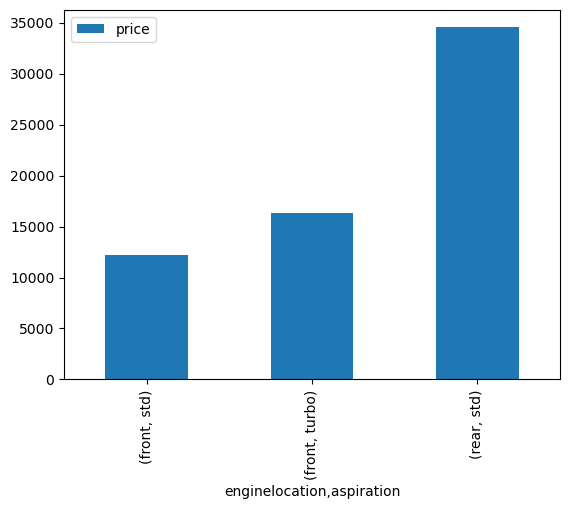

In [31]:
df.plot.bar()

inference:
1. cars with rear and std have the highest average price, this could explain why they are less purchased as the they have the smallest summation and could imply little purchase

In [32]:
#by count
df = pd.DataFrame(cars.groupby(['enginelocation', 'aspiration'])['price'].count())
df

price
enginelocation aspiration       
front          std           165
               turbo          37
rear           std             3

<Axes: xlabel='enginelocation,aspiration'>

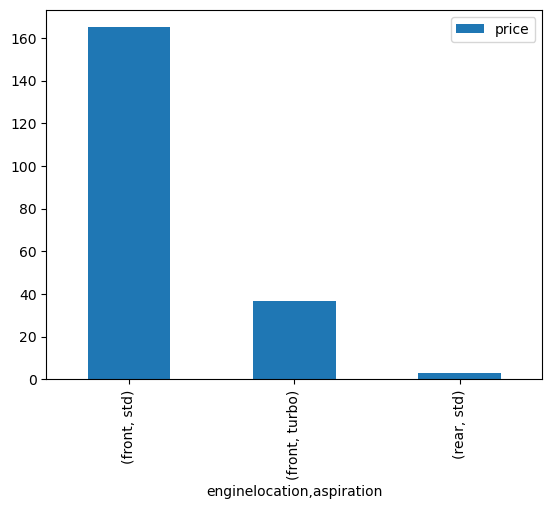

In [33]:
df.plot.bar()

inference:
1. cars with front std are purchased more, due to having a low average price
2. followed by front with turbo then lastly rear with std whose average price is high.

In [34]:
df = pd.DataFrame(cars.groupby(['enginelocation'])['price'].count())
df

,price
enginelocation,
front,202
rear,3


<Axes: xlabel='enginelocation', ylabel='price'>

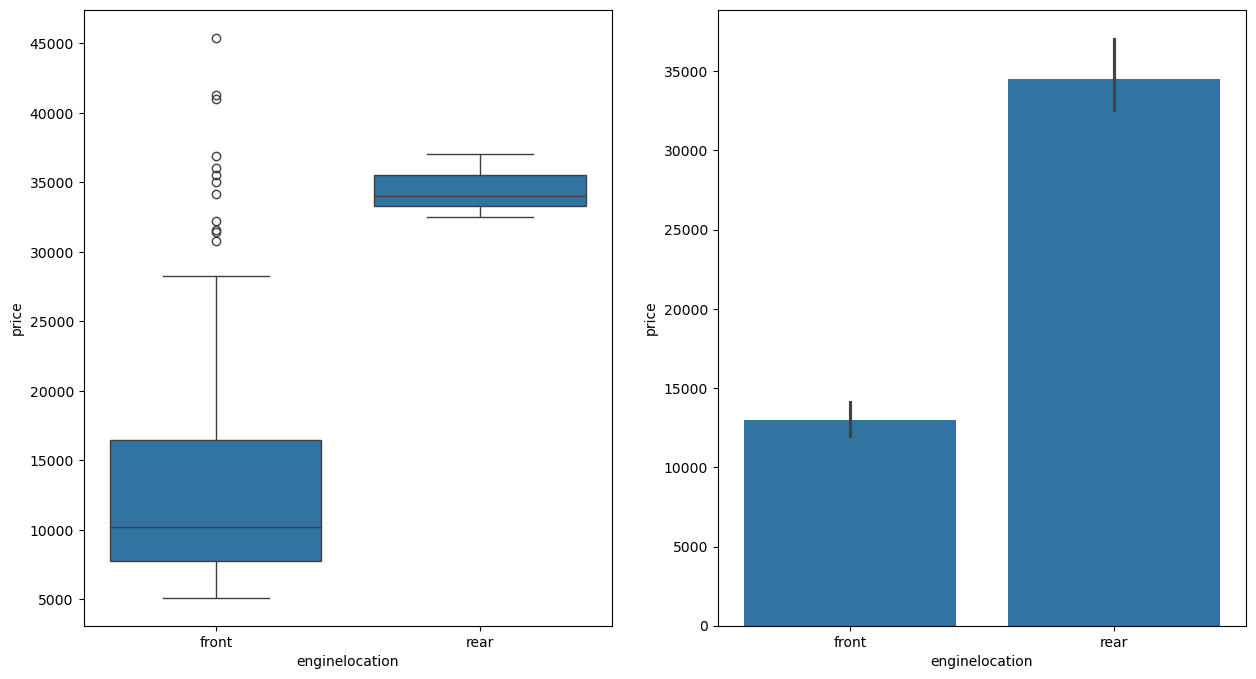

In [35]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.boxplot(x=cars.enginelocation, y=cars.price)


plt.subplot(1,2,2)
sns.barplot(x=cars.enginelocation, y=cars.price)

Find the correlation between price and carlength, carwidth, carheight, car weight using scatterplot

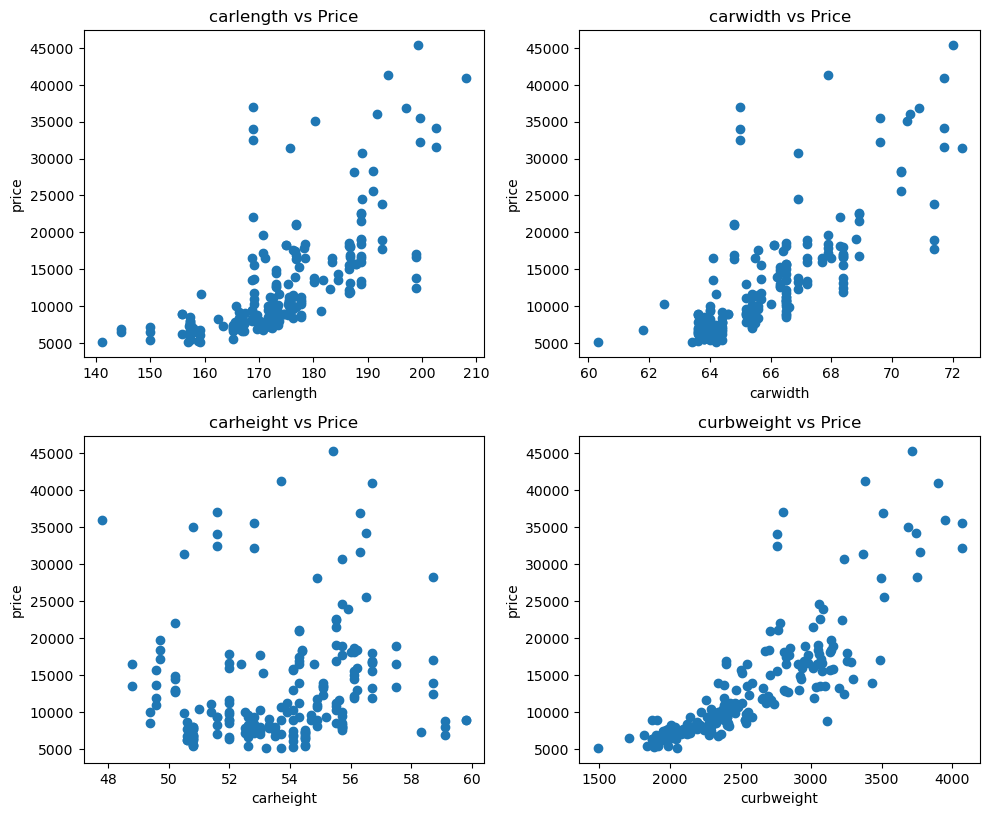

In [36]:
##using the user-defined scatter function to create a subplot.
def scatter(x, fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x], cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('price')
    plt.xlabel(x)
plt.figure(figsize=(10,20))
scatter('carlength',1)
scatter('carwidth',2)
scatter('carheight',3)
scatter('curbweight',4)

plt.tight_layout()

Inference:
1. carwidth, carlength and curbweight have a linear relationship with the target variable(price)

FEATURE ENGINEERING

In [37]:
#derive new field - fuel economy
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [38]:
#binning the car companies based on avg prices of each company
cars['price'] = cars['price'].astype(int)

In [39]:
temp = cars.copy()

In [40]:
table = temp.groupby(['CompanyName'])['price'].mean().reset_index()
temp = pd.merge(table, temp, how='left', on='CompanyName')

In [41]:
temp

,CompanyName,price_x,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_y,fueleconomy
0,alfa-romeo,15498.333333,1,3,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,23.70
1,alfa-romeo,15498.333333,2,3,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,23.70
2,alfa-romeo,15498.333333,3,1,gas,std,two,hatchback,rwd,front,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.15
3,audi,17859.142857,4,2,gas,std,four,sedan,fwd,front,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,26.70
4,audi,17859.142857,5,2,gas,std,four,sedan,4wd,front,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,18063.181818,201,-1,gas,std,four,sedan,rwd,front,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,25.25
201,volvo,18063.181818,202,-1,gas,turbo,four,sedan,rwd,front,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,21.70
202,volvo,18063.181818,203,-1,gas,std,four,sedan,rwd,front,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,20.25
203,volvo,18063.181818,204,-1,diesel,turbo,four,sedan,rwd,front,...,idi,3.01,3.40,23.0,106,4800,26,27,22470,26.45


In [42]:
temp.rename({'price_x':'average_price', 'price_y':'price'}, inplace=True, axis=1)

In [43]:
bins = [0,10000,20000,40000]
cars_bin = ['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price'], bins, right=False, labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [44]:
car_temp = cars.copy()
car_temp.drop('carsrange', axis=1 ,inplace=True)

In [45]:
car_temp.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,23.70
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,23.70
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,22.15
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,26.70
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,19.80


In [46]:
def car_bin(prparam):
    if prparam >=0 and prparam < 10000:
        return 'Budget'
    elif prparam >=10000 and prparam < 20000:
        return 'Medium'
    elif prparam >= 20000 and prparam <40000:
        return 'Highend'
car_temp['carsrange'] = car_temp['price'].apply(car_bin)

In [47]:
car_temp.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [48]:
car_temp['fueleconomy'] = car_temp.apply(lambda row: (0.55*row['citympg']) + (0.45 * row['highwaympg']), axis=1)

In [49]:
car_temp

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845,25.25,Medium
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045,21.70,Medium
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485,20.25,Highend
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470,26.45,Highend


BIVARIATE DATA ANALYSIS
Relationship between fuel economy and price. third dimension-drivewheel

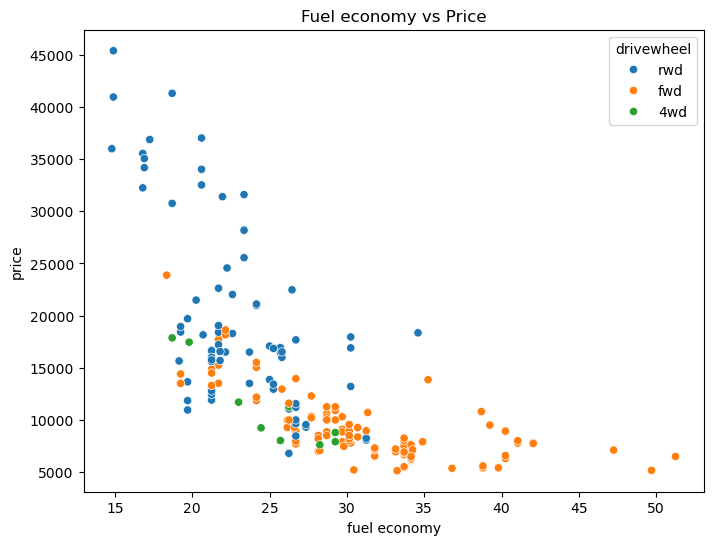

<Figure size 640x480 with 0 Axes>

In [50]:
plt.figure(figsize=(8,6))
plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'], y=cars['price'], hue=cars['drivewheel'])
plt.xlabel('fuel economy')
plt.ylabel('price')

plt.show()
plt.tight_layout()

inference:
1. the price reduces with higher fuel economy
2. the orange dots represent fwd and this means that fwd cars have high fuel economy and lower price compared to rwd

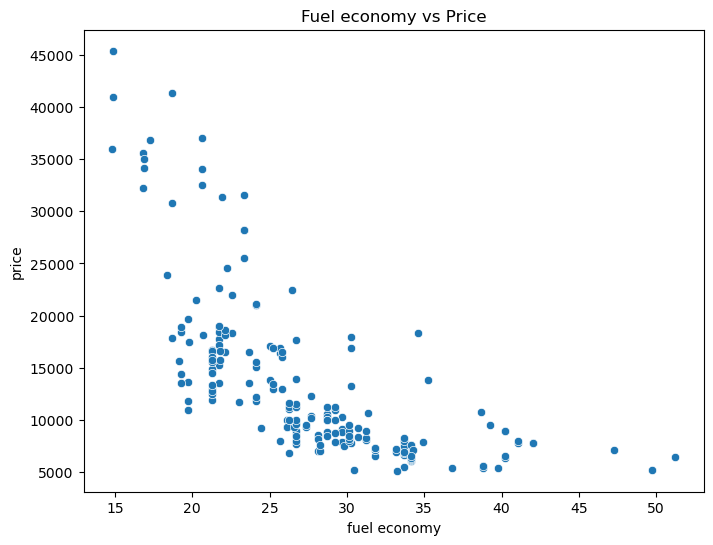

<Figure size 640x480 with 0 Axes>

In [51]:
plt.figure(figsize=(8,6))
plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'], y=cars['price'])
plt.xlabel('fuel economy')
plt.ylabel('price')

plt.show()
plt.tight_layout()

In [52]:
##there is a negative correlation between fuel economy and price

LIST OF SIGNIFICANT VARIABLES AFTER VISUAL  ANSLYSIS:
- CAR RANGE
- ENGINE TYPE
- FUEL TYPE
- CAR BODY
- ASPIRATION
- CYLINDER NUMBER
- DRIVEWHEEL
- CURBWEIGHT
- CAR LENGTH
- CAR WIDTH
- ENGINE SIZE
- BORERATIO
- HORSE POWER
- WHEEL BASE
- FUEL ECONOMY

In [53]:
cars_lr = cars[['price','fueltype','aspiration','carbody','aspiration','cylindernumber','drivewheel','curbweight','carlength',
                'carwidth','enginesize','boreratio','horsepower','wheelbase','fueleconomy','carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,aspiration,cylindernumber,drivewheel,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,fueleconomy,carsrange
0,13495,gas,std,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6,23.70,Medium
1,16500,gas,std,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6,23.70,Medium
2,16500,gas,std,hatchback,std,six,rwd,2823,171.2,65.5,152,2.68,154,94.5,22.15,Medium
3,13950,gas,std,sedan,std,four,fwd,2337,176.6,66.2,109,3.19,102,99.8,26.70,Medium
4,17450,gas,std,sedan,std,five,4wd,2824,176.6,66.4,136,3.19,115,99.4,19.80,Medium


In [54]:
cols = list(cars_lr.columns)
cols_indices = [i for i, col in enumerate(cols) if col == 'aspiration']
if len(cols_indices) > 1:
    cars_lr = cars_lr.drop(cars_lr.columns[cols_indices[1]], axis=1)    

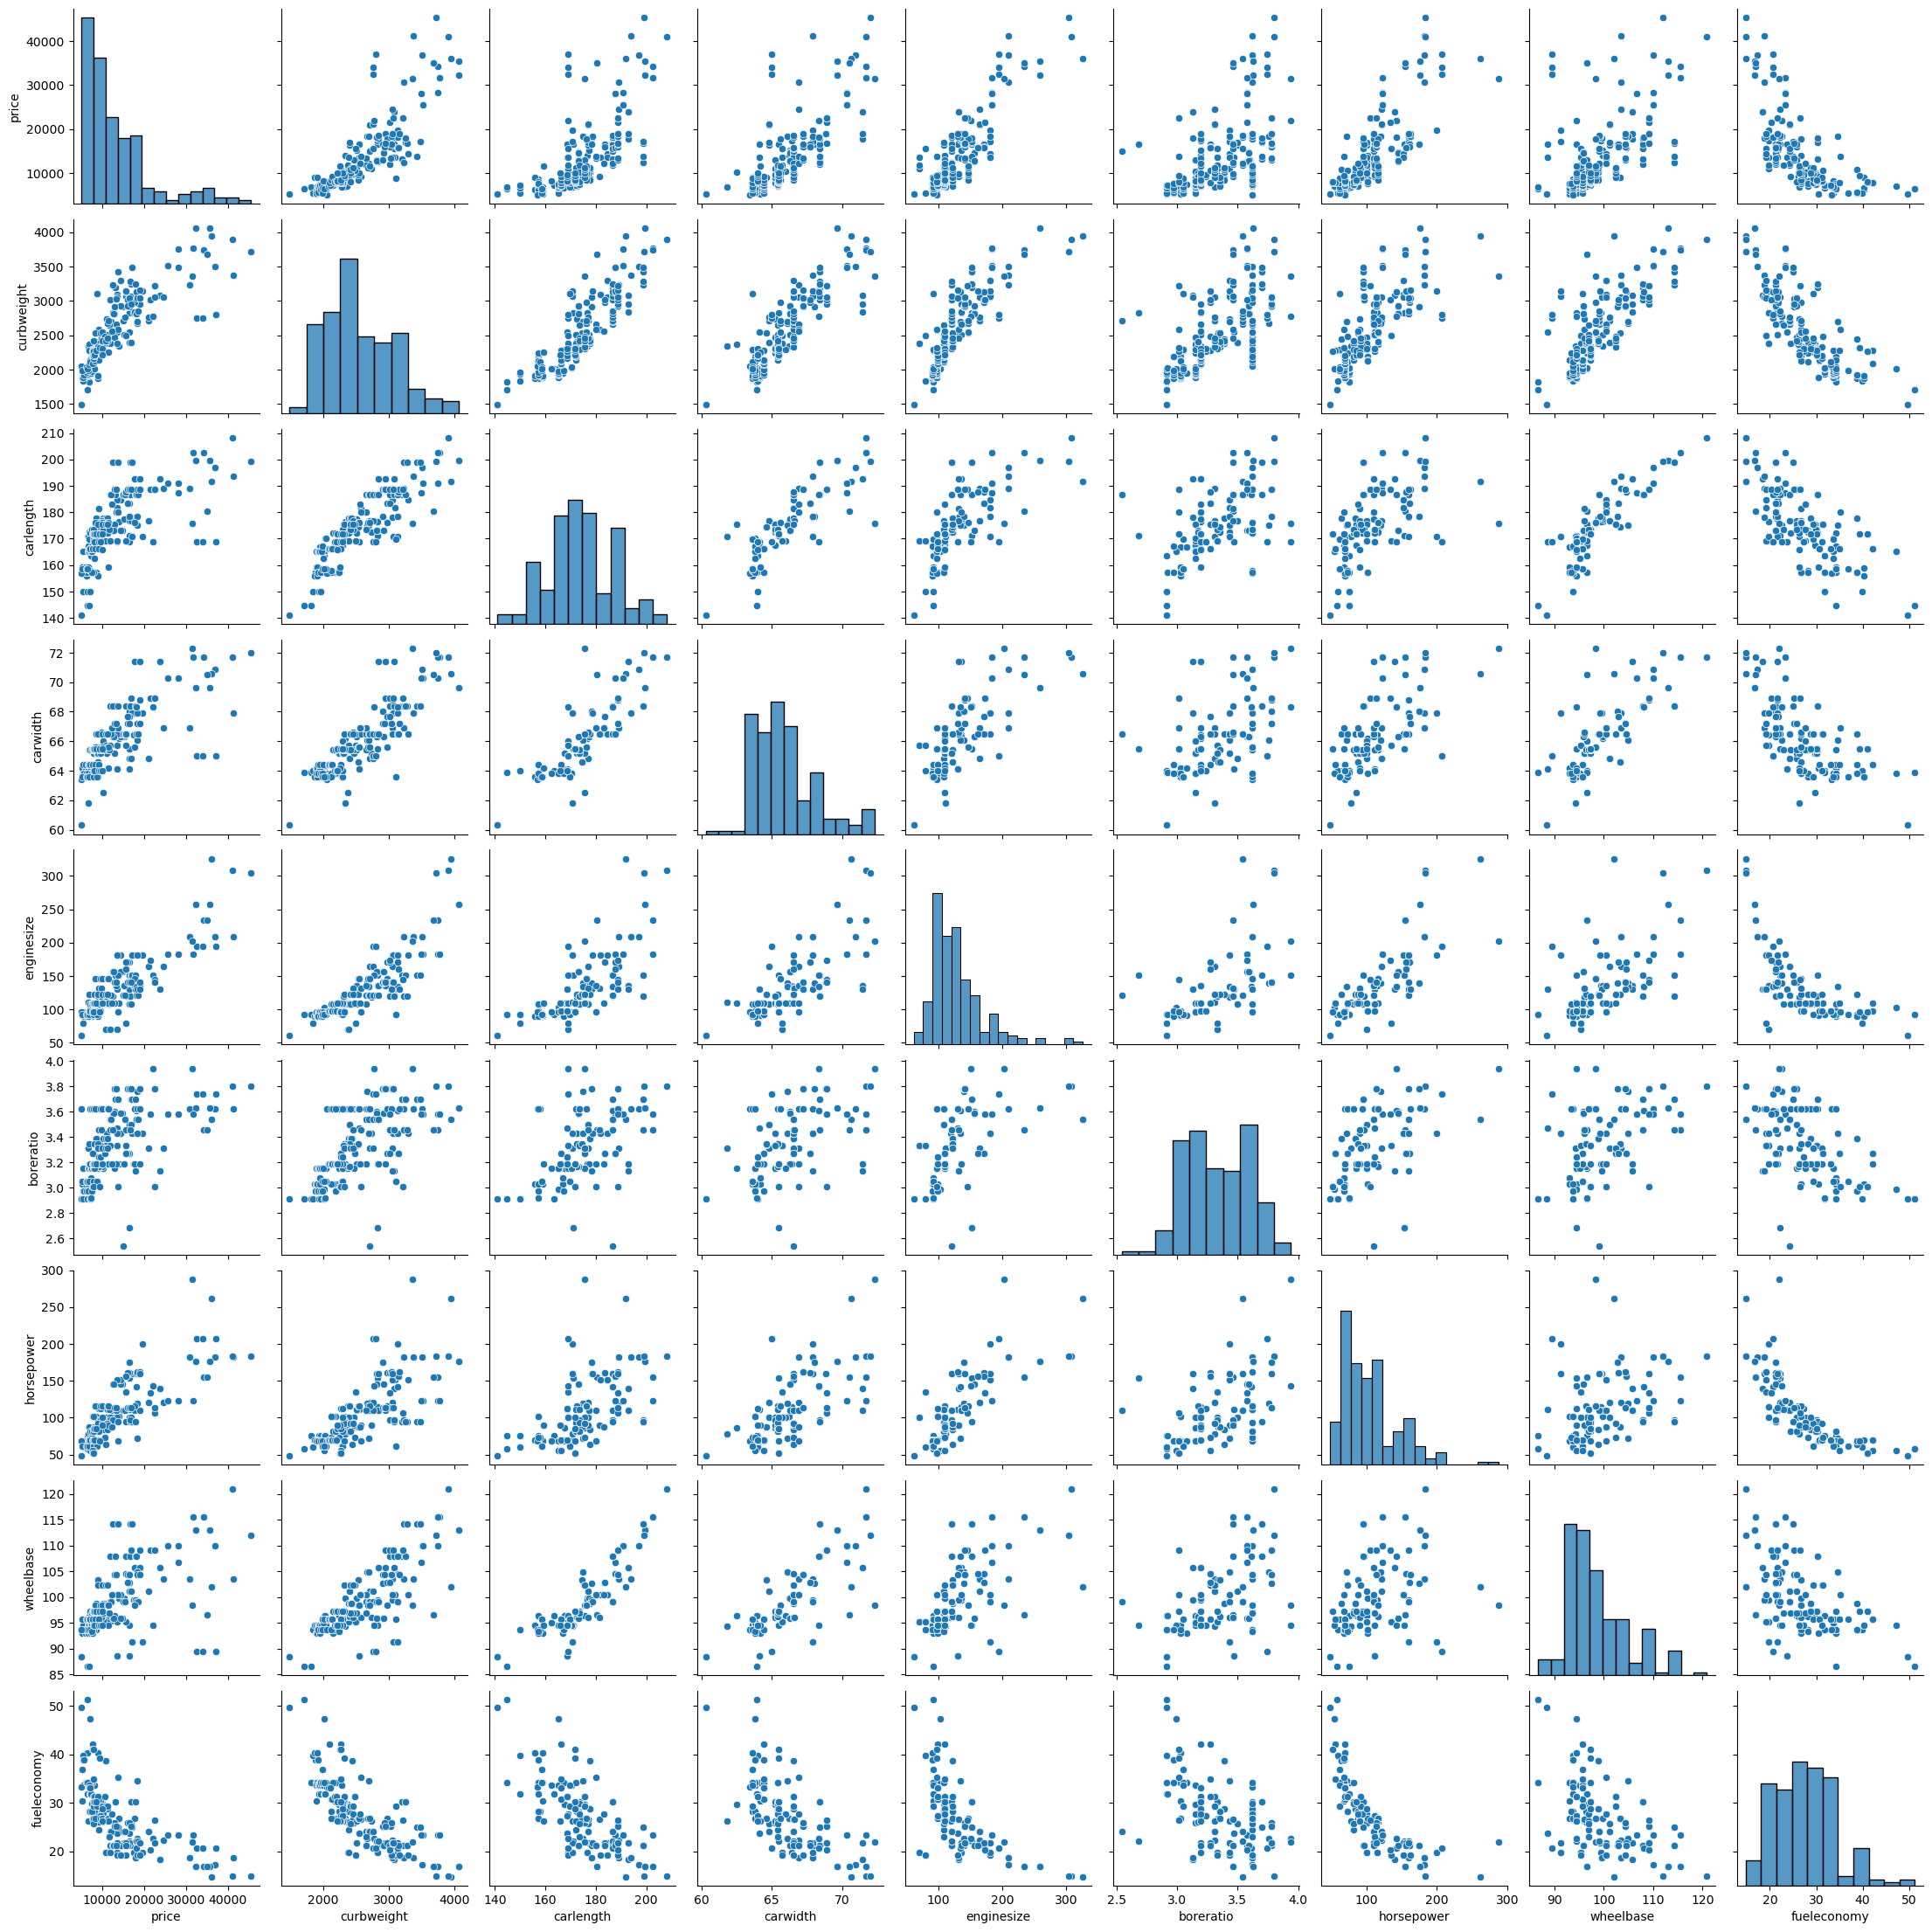

In [55]:
##pair plot of the selected variables
sns.pairplot(cars_lr)
plt.show()

FIND HIGH CORRELATIONS BETWEEN FEATURES

In [56]:
##CHECK THE CORR VALUES OF FINAL LIST OF VARIABLES#
cor = cars.corr(numeric_only=True)
print(cor.shape)
cor

(17, 17)


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093,0.013872
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.003257
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.508136
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682921,-0.691472
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.663419
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119337,-0.076356
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,-0.781535
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,-0.669464
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553174,-0.589898
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,-0.043281


In [57]:
#find out which fields have high degree of correlation
correlated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i,j]) > 0.8:
            colname1 = cor.columns[i]
            colname2 = cor.columns[j]
            print(abs(cor.iloc[i,j]), '---',i,'---',j,'---',colname1,'---',colname2)
            correlated_features.add(colname2)
            correlated_features.add(colname1)        

0.874587475964264 --- 3 --- 2 --- carlength --- wheelbase
0.8411182684818453 --- 4 --- 3 --- carwidth --- carlength
0.8777284608306433 --- 6 --- 3 --- curbweight --- carlength
0.8670324646791233 --- 6 --- 4 --- curbweight --- carwidth
0.850594073426277 --- 7 --- 6 --- enginesize --- curbweight
0.8097686545377302 --- 11 --- 7 --- horsepower --- enginesize
0.8014561756662708 --- 13 --- 11 --- citympg --- horsepower
0.9713370423425045 --- 14 --- 13 --- highwaympg --- citympg
0.835305437204371 --- 15 --- 6 --- price --- curbweight
0.8741451426986426 --- 15 --- 7 --- price --- enginesize
0.8081381197889799 --- 15 --- 11 --- price --- horsepower
0.9938444201653043 --- 16 --- 13 --- fueleconomy --- citympg
0.9916921560568324 --- 16 --- 14 --- fueleconomy --- highwaympg


In [58]:
cor['citympg']['highwaympg']

0.9713370423425045

In [59]:
##print the correlation values from the high correlated fields
corh = cars[list(correlated_features)].corr()
corh

,curbweight,enginesize,carlength,fueleconomy,carwidth,wheelbase,citympg,horsepower,highwaympg,price
curbweight,1.000000,0.850594,0.877728,-0.781535,0.867032,0.776386,-0.757414,0.750739,-0.797465,0.835305
enginesize,0.850594,1.000000,0.683360,-0.669464,0.735433,0.569329,-0.653658,0.809769,-0.677470,0.874145
carlength,0.877728,0.683360,1.000000,-0.691472,0.841118,0.874587,-0.670909,0.552623,-0.704662,0.682921
fueleconomy,-0.781535,-0.669464,-0.691472,1.000000,-0.663419,-0.508136,0.993844,-0.792822,0.991692,-0.696214
carwidth,0.867032,0.735433,0.841118,-0.663419,1.000000,0.795144,-0.642704,0.640732,-0.677218,0.759325
wheelbase,0.776386,0.569329,0.874587,-0.508136,0.795144,1.000000,-0.470414,0.353294,-0.544082,0.577816
citympg,-0.757414,-0.653658,-0.670909,0.993844,-0.642704,-0.470414,1.000000,-0.801456,0.971337,-0.685752
horsepower,0.750739,0.809769,0.552623,-0.792822,0.640732,0.353294,-0.801456,1.000000,-0.770544,0.808138
highwaympg,-0.797465,-0.677470,-0.704662,0.991692,-0.677218,-0.544082,0.971337,-0.770544,1.000000,-0.697600
price,0.835305,0.874145,0.682921,-0.696214,0.759325,0.577816,-0.685752,0.808138,-0.697600,1.000000


<Axes: >

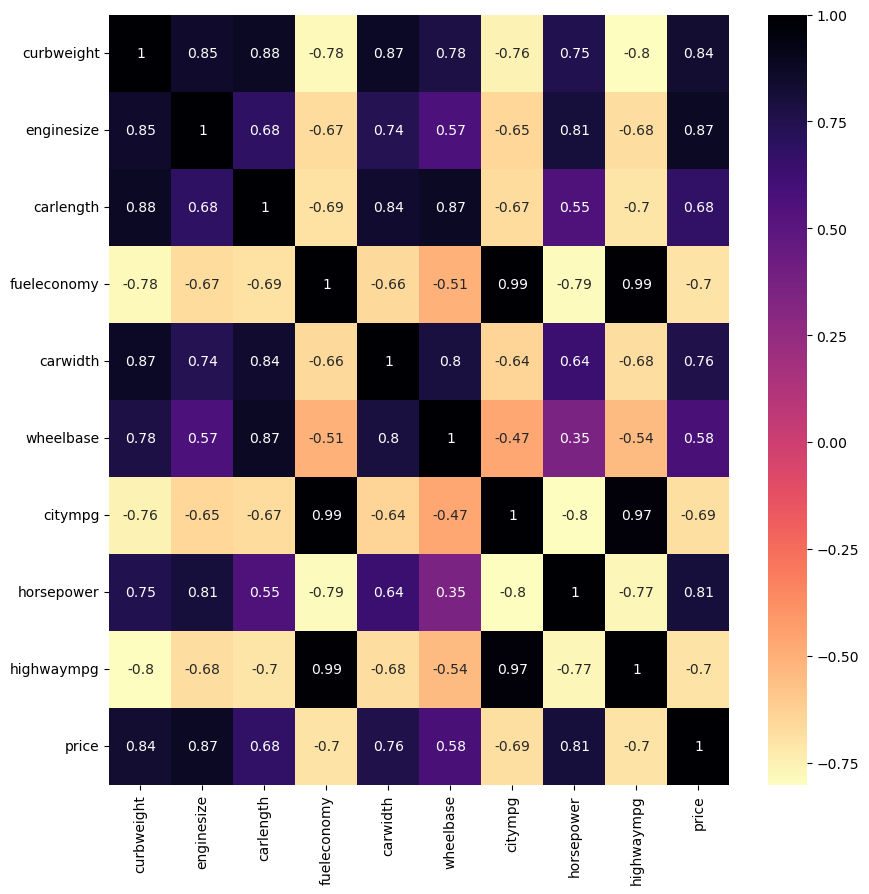

In [60]:
##produce heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corh, annot=True, cmap='magma_r')

FEATURE ENGINEERING
CREATING NUMERIC VARIABLES FROM THE CATEGORICAL VARIABLES

In [61]:
car_obj = cars.dtypes!='object'
car_obj

car_ID               True
symboling            True
CompanyName         False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase            True
carlength            True
carwidth             True
carheight            True
curbweight           True
enginetype          False
cylindernumber      False
enginesize           True
fuelsystem          False
boreratio            True
stroke               True
compressionratio     True
horsepower           True
peakrpm              True
citympg              True
highwaympg           True
price                True
fueleconomy          True
carsrange            True
dtype: bool

In [62]:
##CREATING DUMMIES
#DEFINE A MAP FUNCTION
def dummies(x, df):
    temp = pd.get_dummies(df[x], drop_first=True, dtype=int)
    df = pd.concat([df, temp], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df
##applying the function to the cars_lr
cars_lr = cars
cars_lr = dummies('fueltype', cars_lr)
cars_lr = dummies('CompanyName', cars_lr)
cars_lr = dummies('fuelsystem', cars_lr)
cars_lr = dummies('enginetype', cars_lr)
cars_lr = dummies('cylindernumber', cars_lr)
cars_lr = dummies('enginelocation', cars_lr)
cars_lr = dummies('carbody', cars_lr)
cars_lr = dummies('doornumber', cars_lr)
cars_lr = dummies('aspiration', cars_lr)
cars_lr = dummies('drivewheel', cars_lr)

Train_TEST_SPLIT AND FEATURE SCALING

In [63]:
cars_lr.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,two,rear,hardtop,hatchback,sedan,wagon,two,turbo,fwd,rwd
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,1,0,0,1
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,1,0,0,1
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,1,0,0,1,0,0,1
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,1,0,0,0,1,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,1,0,0,0,0,0


In [64]:
num_vars = cars_lr.dtypes!='object'

In [65]:
cars_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 68 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    int64   
 2   wheelbase         205 non-null    float64 
 3   carlength         205 non-null    float64 
 4   carwidth          205 non-null    float64 
 5   carheight         205 non-null    float64 
 6   curbweight        205 non-null    int64   
 7   enginesize        205 non-null    int64   
 8   boreratio         205 non-null    float64 
 9   stroke            205 non-null    float64 
 10  compressionratio  205 non-null    float64 
 11  horsepower        205 non-null    int64   
 12  peakrpm           205 non-null    int64   
 13  citympg           205 non-null    int64   
 14  highwaympg        205 non-null    int64   
 15  price             205 non-null    int32   
 16  fueleconomy       205 non-

In [66]:
cars_lr

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,two,rear,hardtop,hatchback,sedan,wagon,two,turbo,fwd,rwd
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,1,0,0,1
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,1,0,0,1
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,1,0,0,1,0,0,1
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,1,0,0,0,1,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,1,0,0,0,0,1
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,1,0,0,1,0,1
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,1,0,0,0,0,1
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,1,0,0,1,0,1


In [67]:
cars_lr.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy', 'carsrange', 'gas', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', '2bbl', '4bbl',
       'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two',
       'rear', 'hardtop', 'hatchback', 'sedan', 'wagon', 'two', 'turbo', 'fwd',
       'rwd'],
      dtype='object')

In [68]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cars_lr.carsrange = encoder.fit_transform(cars_lr.carsrange)
cars_lr.carsrange

0      2
1      2
2      2
3      2
4      2
      ..
200    2
201    2
202    1
203    1
204    1
Name: carsrange, Length: 205, dtype: int32

In [69]:
cars_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 68 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    int32  
 16  fueleconomy       205 non-null    float64
 1

In [70]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size=0.7, test_size=0.3, random_state=100)

In [71]:
y_train = df_train.pop('price')
X_train = df_train

In [72]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor #VIF for removes columns with multicollinearity
from sklearn.feature_selection import RFE #Recursive Factor Elimination. selects a subset of features through ranking, hence only imprtant features are selected in a ranking system

In [73]:
from sklearn.preprocessing import MinMaxScaler
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','fueleconomy',
            'horsepower','peakrpm','citympg','highwaympg']
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [74]:
def build_model(X, y):
    X = sm.add_constant(X) #adding a constant thus beta not or theta not
    lm = sm.OLS(y,X).fit() #creating the linear model with ols and fitting it to the data(x_train, y_train)
    print(lm.summary())
    return lm

def checkVIF(X): #this function will regress all the features against each other and produce some r-squared used to calculate the VIF
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif    

def build_model(X,y):
    X = sm.add_constant(X) #adding the constant
    lm = sm.OLS(y, X).fit()#fitting the model
    print(lm.summary())
    return lm

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return vif

In [75]:
model1 = build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     57.29
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           9.78e-49
Time:                        08:33:24   Log-Likelihood:                -1217.3
No. Observations:                 143   AIC:                             2555.
Df Residuals:                      83   BIC:                             2732.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2700.5796   5761.351  

dropping columns whose p-values are greater than 0.05
1. those columns do not explain the dependent and are such that they support the null hypothesis that, the particular predictor has coeff of zero or no influence on the dependent.

In [76]:
X_train1 = X_train.drop(['car_ID', 'symboling', 'wheelbase', 'carlength',
       'compressionratio', 'horsepower', 'citympg', 'highwaympg',
       'fueleconomy', 'carsrange', 'gas', 'audi', 'buick', 'chevrolet',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 
       'nissan', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'six', 'twelve', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'two', 'fwd', 'rwd'], axis=1)

In [77]:
X_train1.columns
#these columns will be used to build a new OLS model as the redudant features thus those with p>0.05 are removed

Index(['carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'peakrpm', 'bmw', 'dodge', 'mitsubishi', 'peugeot', 'rotor',
       'five', 'four', 'three', 'rear', 'turbo'],
      dtype='object')

In [78]:
model2 = build_model(X_train1, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     104.9
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           2.10e-65
Time:                        08:33:24   Log-Likelihood:                -1289.2
No. Observations:                 143   AIC:                             2614.
Df Residuals:                     125   BIC:                             2668.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3603.8969   1628.707     -2.213      0.0

Notice that there are still features with p-value greater than 0
- further optimization through feature elimination is key until a set where all features have p-value less than 0.05

In [79]:
X_train2 = X_train1.drop(['carheight','dodge'], axis=1)

In [80]:
model3 = build_model(X_train2,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     117.9
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           7.57e-67
Time:                        08:33:24   Log-Likelihood:                -1290.8
No. Observations:                 143   AIC:                             2614.
Df Residuals:                     127   BIC:                             2661.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4538.0179   1539.662     -2.947      0.0

In [81]:
#dropping further features
X_train3 = X_train2.drop(['five'], axis=1)

In [82]:
model4 = build_model(X_train3, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     123.2
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           4.47e-67
Time:                        08:33:24   Log-Likelihood:                -1293.0
No. Observations:                 143   AIC:                             2616.
Df Residuals:                     128   BIC:                             2660.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3622.2998   1484.465     -2.440      0.0

from model4 we get to a point where no feature has a pvalue of more than 0.05

In [83]:
import warnings
warnings.filterwarnings('ignore')
checkVIF(X_train1)

,Features,VIF
2,curbweight,71.09
3,enginesize,46.78
0,carwidth,41.51
4,boreratio,24.24
5,stroke,19.13
13,four,18.01
1,carheight,14.81
6,peakrpm,6.34
11,rotor,2.90
12,five,2.21


In [84]:
checkVIF(X_train2)

,Features,VIF
1,curbweight,52.74
0,carwidth,40.33
2,enginesize,37.24
3,boreratio,23.54
4,stroke,18.31
11,four,15.51
5,peakrpm,6.07
9,rotor,2.70
10,five,2.17
14,turbo,1.93


In [85]:
checkVIF(X_train3)

,Features,VIF
1,curbweight,52.58
0,carwidth,35.48
2,enginesize,30.02
3,boreratio,23.03
4,stroke,16.62
10,four,11.60
5,peakrpm,6.04
9,rotor,2.22
13,turbo,1.92
8,peugeot,1.66


Implementing VIF to collect features with high multicollinearity
- after dropping features to get ones that have a p-value less than 0.05, we observe that the current features are flagged as having multicollinearity.

In [86]:
X_train3.columns

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'peakrpm', 'bmw', 'mitsubishi', 'peugeot', 'rotor', 'four', 'three',
       'rear', 'turbo'],
      dtype='object')

In [87]:
X_train4 = X_train3.drop(['carwidth','curbweight','boreratio','stroke',
       'peakrpm','enginesize','four'], axis=1)

In [88]:
X_train4.columns

Index(['bmw', 'mitsubishi', 'peugeot', 'rotor', 'three', 'rear', 'turbo'], dtype='object')

In [89]:
model5 = build_model(X_train4, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     8.039
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           3.76e-08
Time:                        08:33:24   Log-Likelihood:                -1459.2
No. Observations:                 143   AIC:                             2934.
Df Residuals:                     135   BIC:                             2958.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.151e+04    668.470     17.224      0.0

Notice that the more we drop the features, the more the model loses valuable information and will result in having a very low Rsquared and adjusted Rsquared value.

We will try feature elimination with RFE(Recursive Feature Elimination)

In [90]:
X_train1.columns

Index(['carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'peakrpm', 'bmw', 'dodge', 'mitsubishi', 'peugeot', 'rotor',
       'five', 'four', 'three', 'rear', 'turbo'],
      dtype='object')

In [91]:
lm = LinearRegression()
lm.fit(X_train1, y_train)

rfe = RFE(lm, n_features_to_select=10) #pass the linear model to the rfe for it to find the rank of the features
rfe = rfe.fit(X_train1, y_train)

In [92]:
list(zip(X_train1.columns,rfe.support_,rfe.ranking_)) #collect the features ranked bythe rfe function

[('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 3),
 ('peakrpm', False, 6),
 ('bmw', True, 1),
 ('dodge', False, 8),
 ('mitsubishi', True, 1),
 ('peugeot', True, 1),
 ('rotor', False, 2),
 ('five', False, 5),
 ('four', False, 4),
 ('three', True, 1),
 ('rear', True, 1),
 ('turbo', False, 7)]

In [93]:
X_train1.columns[rfe.support_]

Index(['carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'bmw',
       'mitsubishi', 'peugeot', 'three', 'rear'],
      dtype='object')

In [94]:
##using the rfe selected features
X_train_rfe = X_train[X_train1.columns[rfe.support_]] #this will pick out the rfe selected features from the X_train and creates a new dataframe
X_train_rfe.head()

,carwidth,carheight,curbweight,enginesize,boreratio,bmw,mitsubishi,peugeot,three,rear
122,0.291667,0.265487,0.272692,0.139623,0.230159,0,0,0,0,0
125,0.666667,0.212389,0.500388,0.339623,1.000000,0,0,0,0,0
166,0.308333,0.424779,0.314973,0.139623,0.444444,0,0,0,0,0
1,0.316667,0.088496,0.411171,0.260377,0.626984,0,0,0,0,0
199,0.575000,0.858407,0.647401,0.260377,0.746032,0,0,0,0,0


Create model using RFE features

In [95]:
model6 = build_model(X_train_rfe, y_train) #build a model on the new dataset from the rfe

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     152.8
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           1.78e-67
Time:                        08:33:25   Log-Likelihood:                -1303.1
No. Observations:                 143   AIC:                             2628.
Df Residuals:                     132   BIC:                             2661.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.5073    774.041      0.078      0.9

pvalue for stroke, mitsubishi, and 
three are large and hence we have to drop them

In [96]:
X_train_rfe1=X_train_rfe.drop(['mitsubishi','three'], axis=1)

In [97]:
X_train_rfe1

,carwidth,carheight,curbweight,enginesize,boreratio,bmw,peugeot,rear
122,0.291667,0.265487,0.272692,0.139623,0.230159,0,0,0
125,0.666667,0.212389,0.500388,0.339623,1.000000,0,0,0
166,0.308333,0.424779,0.314973,0.139623,0.444444,0,0,0
1,0.316667,0.088496,0.411171,0.260377,0.626984,0,0,0
199,0.575000,0.858407,0.647401,0.260377,0.746032,0,0,0
...,...,...,...,...,...,...,...,...
87,0.425000,0.336283,0.354926,0.184906,0.388889,0,0,0
103,0.516667,0.646018,0.609775,0.452830,0.595238,0,0,0
67,0.833333,0.769912,0.786268,0.460377,0.714286,0,0,0
24,0.291667,0.247788,0.185803,0.109434,0.230159,0,0,0


In [98]:
model7 = build_model(X_train_rfe1, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     163.2
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           3.42e-65
Time:                        08:33:25   Log-Likelihood:                -1314.3
No. Observations:                 143   AIC:                             2647.
Df Residuals:                     134   BIC:                             2673.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -292.8907    786.242     -0.373      0.7

In [99]:
X_train_new = sm.add_constant(X_train_rfe1)

In [100]:
X_train_new

,const,carwidth,carheight,curbweight,enginesize,boreratio,bmw,peugeot,rear
122,1.0,0.291667,0.265487,0.272692,0.139623,0.230159,0,0,0
125,1.0,0.666667,0.212389,0.500388,0.339623,1.000000,0,0,0
166,1.0,0.308333,0.424779,0.314973,0.139623,0.444444,0,0,0
1,1.0,0.316667,0.088496,0.411171,0.260377,0.626984,0,0,0
199,1.0,0.575000,0.858407,0.647401,0.260377,0.746032,0,0,0
...,...,...,...,...,...,...,...,...,...
87,1.0,0.425000,0.336283,0.354926,0.184906,0.388889,0,0,0
103,1.0,0.516667,0.646018,0.609775,0.452830,0.595238,0,0,0
67,1.0,0.833333,0.769912,0.786268,0.460377,0.714286,0,0,0
24,1.0,0.291667,0.247788,0.185803,0.109434,0.230159,0,0,0


Hence the final dataset is X_train_new which has been optimized to have the rsqaured and adj to be 0.86 and 0.85 respectively

Residual Analysis

In [101]:
##calculatinn residuals
y_train_price = model7.predict(X_train_new) #predict the values of the x_train dataset for comparison with the actual.

In [102]:
y_train_price

122     8458.085451
125    17870.304974
166     8489.350720
1      11933.816049
199    17125.638552
           ...     
87     11590.746158
103    18219.053069
67     25189.809243
24      6723.880221
8      22832.115835
Length: 143, dtype: float64

In [103]:
new_df = pd.concat([X_train_new, y_train_price], axis=1)
new_df

,const,carwidth,carheight,curbweight,enginesize,boreratio,bmw,peugeot,rear,0
122,1.0,0.291667,0.265487,0.272692,0.139623,0.230159,0,0,0,8458.085451
125,1.0,0.666667,0.212389,0.500388,0.339623,1.000000,0,0,0,17870.304974
166,1.0,0.308333,0.424779,0.314973,0.139623,0.444444,0,0,0,8489.350720
1,1.0,0.316667,0.088496,0.411171,0.260377,0.626984,0,0,0,11933.816049
199,1.0,0.575000,0.858407,0.647401,0.260377,0.746032,0,0,0,17125.638552
...,...,...,...,...,...,...,...,...,...,...
87,1.0,0.425000,0.336283,0.354926,0.184906,0.388889,0,0,0,11590.746158
103,1.0,0.516667,0.646018,0.609775,0.452830,0.595238,0,0,0,18219.053069
67,1.0,0.833333,0.769912,0.786268,0.460377,0.714286,0,0,0,25189.809243
24,1.0,0.291667,0.247788,0.185803,0.109434,0.230159,0,0,0,6723.880221


In [104]:
y_train

122     7609
125    22018
166     9538
1      16500
199    18950
       ...  
87      9279
103    13499
67     25552
24      6229
8      23875
Name: price, Length: 143, dtype: int32

Text(0.5, 0, 'Errors')

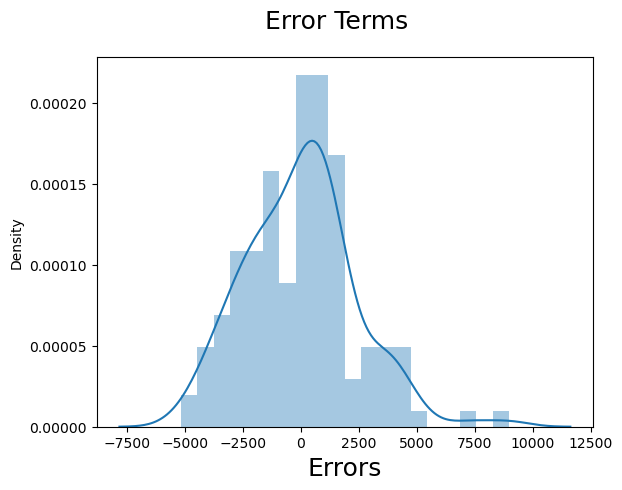

In [105]:
##plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train-y_train_price), bins=20)
fig.suptitle('Error Terms', fontsize=18)
plt.xlabel('Errors', fontsize=18)

we see that the plot of the error terms is normally distributed
- thus the assumption on the linear modeling seems to be fulfilled

Prediction and evaluation using test data

In [106]:
df_test

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,two,rear,hardtop,hatchback,sedan,wagon,two,turbo,fwd,rwd
160,161,0,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,...,0,0,0,0,1,0,0,0,1,0
186,187,2,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,...,0,0,0,0,1,0,0,0,1,0
59,60,1,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,...,0,0,0,1,0,0,1,0,1,0
165,166,1,94.5,168.7,64.0,52.6,2265,98,3.24,3.08,...,0,0,0,0,1,0,1,0,0,1
140,141,2,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,29,-1,103.3,174.6,64.6,59.8,2535,122,3.34,3.46,...,0,0,0,0,0,1,0,0,1,0
29,30,3,95.9,173.2,66.3,50.2,2811,156,3.60,3.90,...,0,0,0,1,0,0,1,1,1,0
182,183,2,97.3,171.7,65.5,55.7,2261,97,3.01,3.40,...,0,0,0,0,1,0,1,0,1,0
40,41,0,96.5,175.4,62.5,54.1,2372,110,3.15,3.58,...,0,0,0,0,1,0,0,0,1,0


In [107]:
#scaling the test data
df_test.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy', 'carsrange', 'gas', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', '2bbl', '4bbl',
       'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two',
       'rear', 'hardtop', 'hatchback', 'sedan', 'wagon', 'two', 'turbo', 'fwd',
       'rwd'],
      dtype='object')

In [108]:
X_train_new.columns

Index(['const', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'bmw', 'peugeot', 'rear'],
      dtype='object')

In [109]:
num_vars = ['carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'bmw', 'peugeot', 'rear']
df_test1 = pd.DataFrame(scaler.fit_transform(df_test[num_vars]),columns=num_vars)
df_test1

,carwidth,carheight,curbweight,enginesize,boreratio,bmw,peugeot,rear
0,0.200000,0.346154,0.132148,0.082969,0.515873,0.0,0.0,0.0
1,0.315789,0.605769,0.219125,0.131004,0.515873,0.0,0.0,0.0
2,0.421053,0.413462,0.271985,0.187773,0.674603,0.0,0.0,0.0
3,0.157895,0.307692,0.214320,0.082969,0.555556,0.0,0.0,0.0
4,0.136842,0.605769,0.202307,0.126638,0.857143,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
57,0.221053,1.000000,0.344065,0.187773,0.634921,0.0,0.0,0.0
58,0.400000,0.076923,0.476694,0.336245,0.841270,0.0,0.0,0.0
59,0.315789,0.605769,0.212398,0.078603,0.373016,0.0,0.0,0.0
60,0.000000,0.451923,0.265738,0.135371,0.484127,0.0,0.0,0.0


MODEL PERFORMANCE COMPARISON BETWEEN TRAIN AND TEST (GENERALISATION)

From the above we can see that the distribution of the residuals does not center at 0 hence the mean of the errors in not 0. implying that the model did not perform too well in predicting the values

In [110]:
y_test = df_test.pop('price')

In [111]:
y_test

160     7738
186     8495
59      8845
165     9298
140     7603
       ...  
28      8921
29     12964
182     7775
40     10295
128    37028
Name: price, Length: 62, dtype: int32

In [112]:
X_test = df_test1
X_test_new = sm.add_constant(X_test)
X_test_new

,const,carwidth,carheight,curbweight,enginesize,boreratio,bmw,peugeot,rear
0,1.0,0.200000,0.346154,0.132148,0.082969,0.515873,0.0,0.0,0.0
1,1.0,0.315789,0.605769,0.219125,0.131004,0.515873,0.0,0.0,0.0
2,1.0,0.421053,0.413462,0.271985,0.187773,0.674603,0.0,0.0,0.0
3,1.0,0.157895,0.307692,0.214320,0.082969,0.555556,0.0,0.0,0.0
4,1.0,0.136842,0.605769,0.202307,0.126638,0.857143,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
57,1.0,0.221053,1.000000,0.344065,0.187773,0.634921,0.0,0.0,0.0
58,1.0,0.400000,0.076923,0.476694,0.336245,0.841270,0.0,0.0,0.0
59,1.0,0.315789,0.605769,0.212398,0.078603,0.373016,0.0,0.0,0.0
60,1.0,0.000000,0.451923,0.265738,0.135371,0.484127,0.0,0.0,0.0


In [113]:
y_pred = model7.predict(X_test_new)
y_pred

0      3354.982279
1      6122.592991
2      9236.902021
3      4250.579797
4      2547.682221
          ...     
57     6027.813441
58    14456.077525
59     5878.497390
60     3109.712696
61    32010.963948
Length: 62, dtype: float64

<Axes: ylabel='Density'>

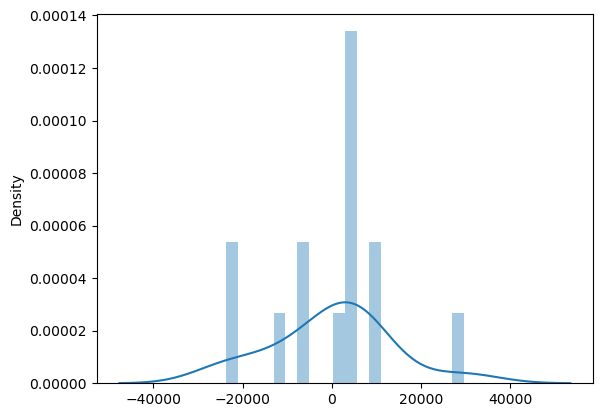

In [114]:
##performimg a residual plot on the predicted data 
plt.figure()
sns.distplot((y_test-y_pred), bins=20)

In [115]:
from sklearn.metrics import r2_score
print('Test Prediction R-sqrd: ', round(r2_score(y_test,y_pred),3))

Test Prediction R-sqrd:  0.796


In [116]:
print('Test Prediction R-sqrd: ', round(r2_score(y_train,y_train_price),3))

Test Prediction R-sqrd:  0.907


Inference:
- R-squared value for training data is 90.7% and for the test data it is 80%
- this cores are fairly decent.

Text(0, 0.5, 'y_pred')

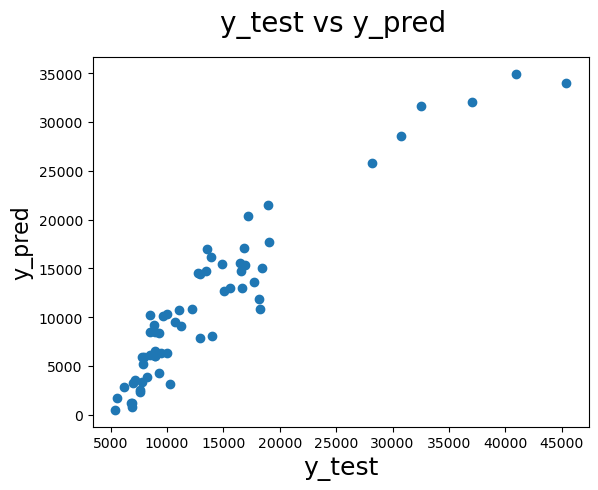

In [117]:
##EVALUATION OF THE MODEL
#plotting y_test, y_pred as a scatter to check for linearity
plt.figure()
plt.scatter(y_test, y_pred)
plt.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [118]:
##residual normality
residt = model7.resid
residt

122    -849.085451
125    4147.695026
166    1048.649280
1      4566.183951
199    1824.361448
          ...     
87    -2311.746158
103   -4720.053069
67      362.190757
24     -494.880221
8      1042.884165
Length: 143, dtype: float64

<Figure size 800x600 with 0 Axes>

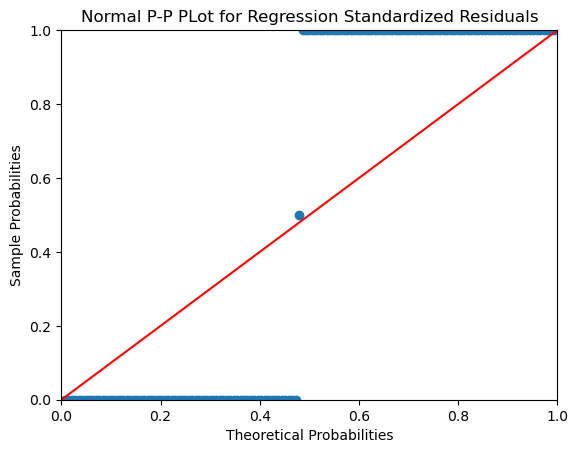

In [119]:
## residual normality
probplot = sm.ProbPlot(residt)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.title('Normal P-P PLot for Regression Standardized Residuals')
plt.show()

Text(0, 0.5, 'Standardized Residuals')

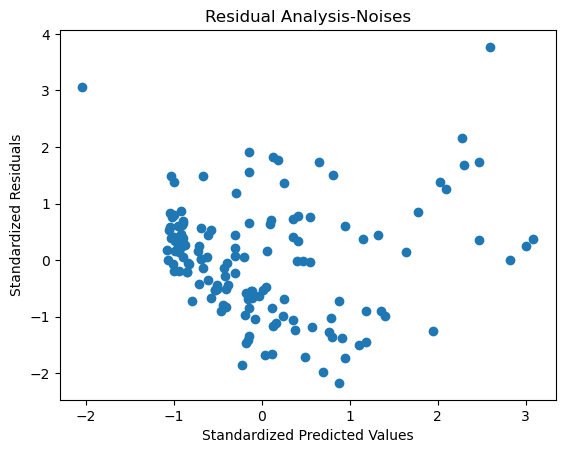

In [120]:
###test of homoscedasticity
def get_standard_values(parm):
    return (parm - parm.mean())/parm.std()

plt.scatter(get_standard_values(model7.fittedvalues), get_standard_values(residt))
plt.title('Residual Analysis-Noises')
plt.xlabel('Standardized Predicted Values')
plt.ylabel('Standardized Residuals')

In [121]:
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     163.2
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           3.42e-65
Time:                        08:33:26   Log-Likelihood:                -1314.3
No. Observations:                 143   AIC:                             2647.
Df Residuals:                     134   BIC:                             2673.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -292.8907    786.242     -0.373      0.7